In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split

# Correct imports for TensorFlow 2.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input

In [3]:
path = r"C:\Users\SHoeib Tek\Desktop\PRODIGY TASKS\task-04 ML\leap gest recog"
folders = os.listdir(path)
inner_folders = os.listdir(path+"/01")
categories=[]
for i in inner_folders:
  category = i.split('_', maxsplit=1)[1:]
  categories.append(category[0])
num_classes = len(categories)
categories

['palm',
 'l',
 'fist',
 'fist_moved',
 'thumb',
 'index',
 'ok',
 'palm_moved',
 'c',
 'down']

In [5]:
df = pd.DataFrame(columns=['filepaths','categories'])
paths , category = [], []
for folder in folders:
  inner_folders = os.listdir(path+'/'+folder)
  for inner_f in inner_folders:
    files = os.listdir(path+'/'+folder+"/"+inner_f)
    for file in files:
      paths.append(folder+'/'+inner_f+'/'+file)
      category.append(inner_f.split('_', maxsplit=1)[1])
df['filepaths'] = paths
df['categories'] = category

In [7]:
im_size = (224, 224)
im_width, im_height = im_size
im_channels=1
batch_size = 50

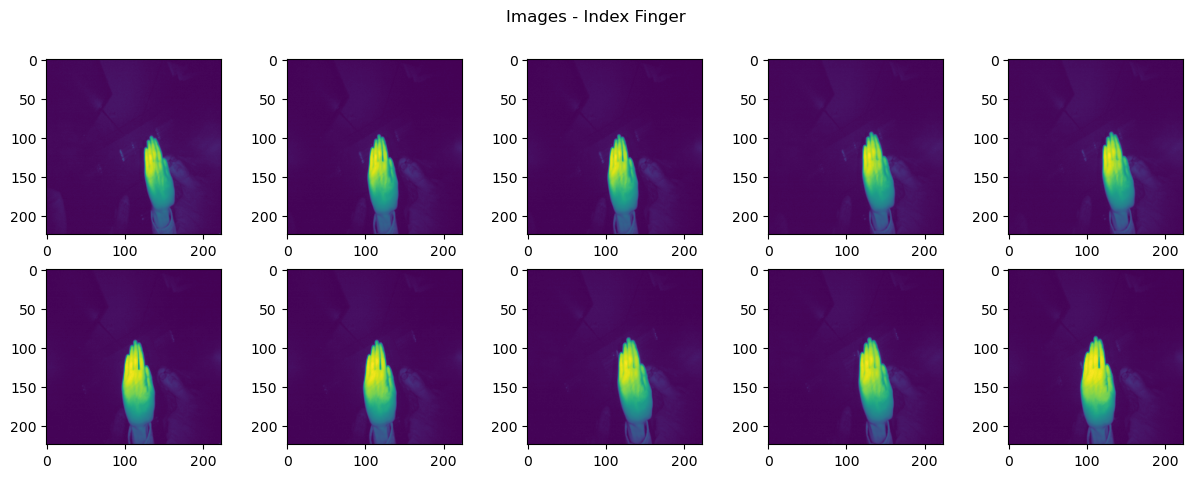

In [9]:
fig = plt.figure(figsize=(15,5))
fig.suptitle("Images - Index Finger")

for i in range(10):
  img = Image.open(path+'/'+df['filepaths'][i])
  img = img.resize(im_size)
  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  # print(img.shape)
plt.show()

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=123)
train_df[:5]

,filepaths,categories
9642,04/09_c/frame_04_09_0043.png,c
17924,08/10_down/frame_08_10_0125.png,down
1642,00/09_c/frame_00_09_0043.png,c
9670,04/09_c/frame_04_09_0071.png,c
16860,08/05_thumb/frame_08_05_0061.png,thumb


In [13]:
train_datagen = ImageDataGenerator(rescale=1/.255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=40)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 16000 validated image filenames belonging to 10 classes.


In [15]:
val_datagen = ImageDataGenerator(rescale=1/.255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 2000 validated image filenames belonging to 10 classes.


In [17]:
model = Sequential([
    Input(shape=(im_size[0], im_size[1], 1)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)


In [19]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [21]:
model_hist = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),   
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100


f:\Users\SHoeib Tek\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - acc: 0.1275 - loss: 8.4011 - val_acc: 0.1925 - val_loss: 2.1559 - learning_rate: 0.0010
Epoch 2/100


f:\Users\SHoeib Tek\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


320/320 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.1925 - val_loss: 2.1559 - learning_rate: 0.0010
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 275s 853ms/step - acc: 0.2041 - loss: 2.0883 - val_acc: 0.2805 - val_loss: 1.8116 - learning_rate: 0.0010
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.2805 - val_loss: 1.8116 - learning_rate: 0.0010
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 267s 826ms/step - acc: 0.2473 - loss: 1.9666 - val_acc: 0.3210 - val_loss: 1.7396 - learning_rate: 0.0010
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3210 - val_loss: 1.7396 - learning_rate: 0.0010
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 269s 834ms/step - acc: 0.2776 - loss: 1.9035 - val_acc: 0.3355 - val_loss: 1.6945 - learning_rate: 0.0010
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3355 - 

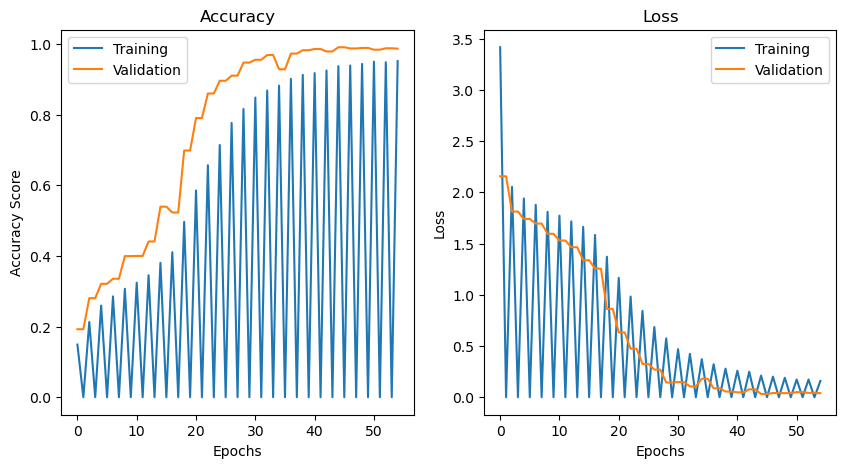

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(model_hist.history['acc'], label='Training')
plt.plot(model_hist.history['val_acc'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_hist.history['loss'], label='Training')
plt.plot(model_hist.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.savefig("Training History.jpg")
plt.show()

In [25]:
model.save('hand_gesture_recognition.h5')

In [27]:
basic_test_generator = train_datagen.flow_from_dataframe(
    test_df,
    path+'/',
    x_col='filepaths',
    y_col='categories',
    target_size = im_size,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    classes=categories
)

Found 2000 validated image filenames belonging to 10 classes.


In [29]:
loss, acc = model.evaluate(basic_test_generator)
print("Testing Loss:", loss)
print("Testing Accuracy:", acc)

f:\Users\SHoeib Tek\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.9704 - loss: 0.1031
Testing Loss: 0.11880505830049515
Testing Accuracy: 0.9660000205039978


In [31]:
from PIL import Image

In [33]:
test_df[40:48]

,filepaths,categories
4662,02/04_fist_moved/frame_02_04_0063.png,fist_moved
13352,06/07_ok/frame_06_07_0153.png,ok
13647,06/09_c/frame_06_09_0048.png,c
5615,02/09_c/frame_02_09_0016.png,c
17957,08/10_down/frame_08_10_0158.png,down
15652,07/09_c/frame_07_09_0053.png,c
9179,04/06_index/frame_04_06_0180.png,index
5668,02/09_c/frame_02_09_0069.png,c


In [35]:
sample_imgs=[]
for img_paths in test_df[100:108]['filepaths']:
  img = Image.open(path+'/'+img_paths)
  img = img.resize(im_size)
  img = img.convert('L')
  img = np.array(img)
  img = img.reshape((img.shape[0], img.shape[1], 1))
  sample_imgs.append(img)
sample_imgs = np.array(sample_imgs)
sample_imgs.shape

(8, 224, 224, 1)

In [37]:
preds = model.predict(sample_imgs)
preds = np.argmax(preds, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


In [39]:
preds

array([3, 7, 3, 8, 0, 9, 2, 0], dtype=int64)

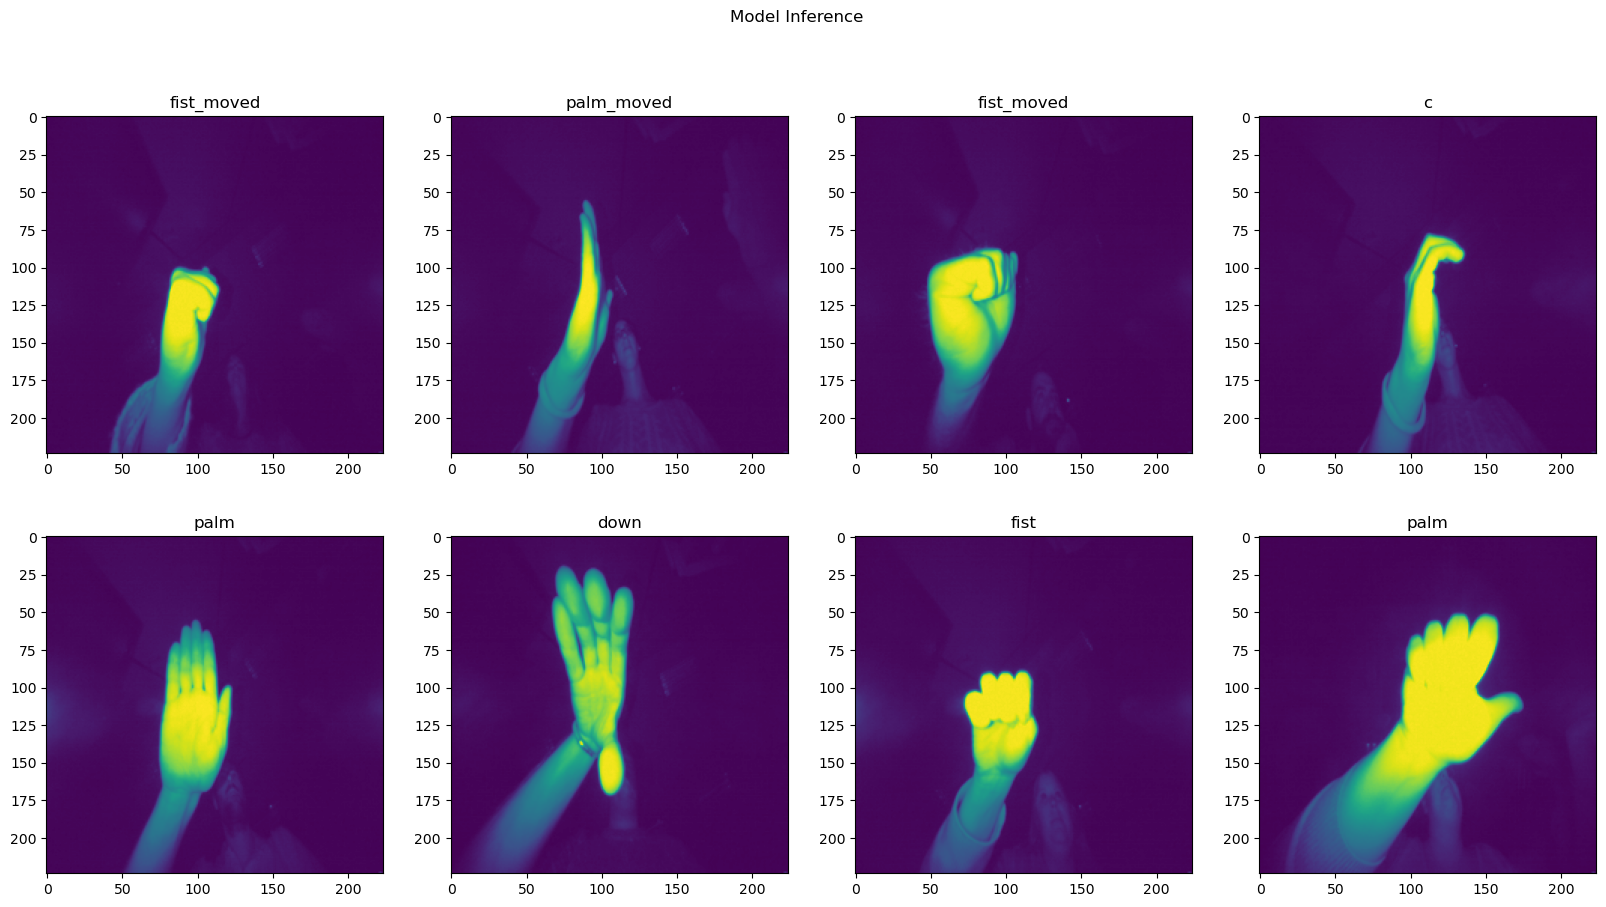

In [41]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Model Inference")
ind=1
for img in sample_imgs:
  plt.subplot(2,4,ind)
  plt.imshow(img)
  plt.title(categories[preds[ind-1]])
  ind+=1
plt.savefig("Hand Gesture model Inference.jpg")
plt.show()